In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Initial Test with Galaxia Data

This is a first pass test of using the data generated by the galaxia code. Here, I used the example file that came with the code for the parameters, called 'myparameterfile'. All the code here was run on /u/casey_lam/ (sloop, not galley!), but can be opened anywhere, because of the wonders of GitHub :) 

### Positions 

First, we import the positions of the stars (both cartesian and spherical coordinates), and see if, when plotted, give equivalent things. First, cartesian coordinates.

In [2]:
#load cartesian coordinates from galaxia, galaxy1.ebf. parameters came from default file
xcoord = np.loadtxt("galaxia_px") #kpc, heliocentric
ycoord = np.loadtxt("galaxia_py") #kpc, heliocentric
zcoord = np.loadtxt("galaxia_pz") #kpc, heliocentric

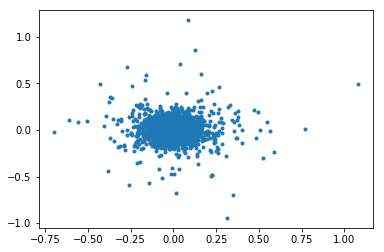

In [3]:
#slice of the x-y plane
plt.plot(xcoord,ycoord,'.')
plt.show()

I am not absolutely sure where the cone shape is coming from exactly,but I suspect it comes from a particular input that was picked in the parameter file, having to do with the survey area. The next goal is to run another simulation, changing that parameter, and seeing if it makes a difference.

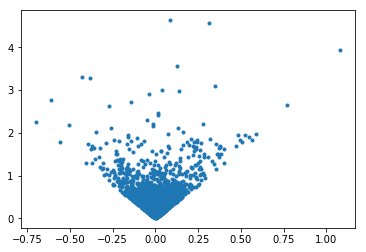

In [4]:
#slice of the x-z plane
plt.plot(xcoord,zcoord,'.')
plt.show()

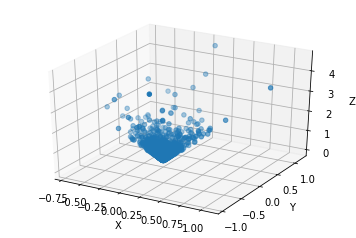

In [5]:
#full 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xcoord, ycoord, zcoord)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

Next, we try spherical coordinates.

In [6]:
#load galactic coordinates from galaxia, galaxy1.ebf. parameters came from default file
bcoord=(np.loadtxt("galaxia_glat"))*np.pi/180 #galactic latitude, degrees to radians
lcoord=(np.loadtxt("galaxia_glon"))*np.pi/180 #galactice longitude, degrees to radians
rcoord=np.loadtxt("galaxia_rad") #kpc, radial distance (from where- the sun?)

In [7]:
#convert from spherical to cartesian, for ease of plotting
xconv = rcoord*np.sin(bcoord)*np.cos(lcoord)
yconv = rcoord*np.sin(bcoord)*np.sin(lcoord)
zconv = rcoord*np.cos(bcoord)

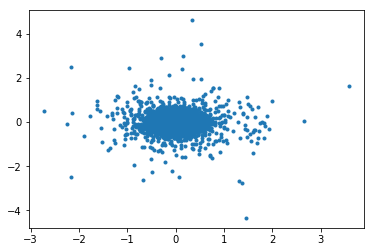

In [8]:
#slice of the x-y plane
plt.plot(xconv,yconv,'.')
plt.show()

We get a similar cone-ish shape as before, but now it's spread out a lot more.

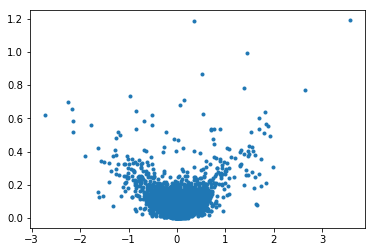

In [9]:
#slice of the x-z plane
plt.plot(xconv,zconv,'.')
plt.show()

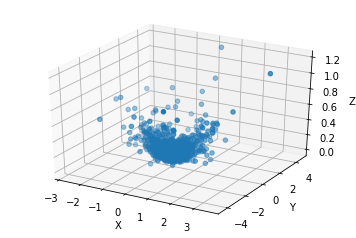

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xconv, yconv, zconv)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

Investigating further, it appears that something weird is going on with the coordinate b (the latitude). In the code below, you can change the number 'i' for the input. The difference in the radius squared is always very small, so that seems to make sense. The difference in the longitude coordinate is also very small, or either -3.14 or -6.28, which is just an issue with the definition of arctangent. However, the difference in the latitude coordinate is always something that's pretty big, and I'm not sure what to make of that.

In [11]:
i = 12

#difference of the radius squared, between cartesian and spherical data
print(xcoord[i]**2 + ycoord[i]**2 + zcoord[i]**2 - rcoord[i]**2)

#difference of the longitude coordinate, between the cartesian and spherical data
print(np.arctan(ycoord[i]/xcoord[i]) - lcoord[i])

#difference of the latitude coordinate, between the cartesian and spherical data
print(np.arccos(zcoord[i]/np.sqrt(xcoord[i]**2 + ycoord[i]**2 + zcoord[i]**2)) - bcoord[i])

-5.62479379046e-10
-1.21529468156e-07
-1.00199958381


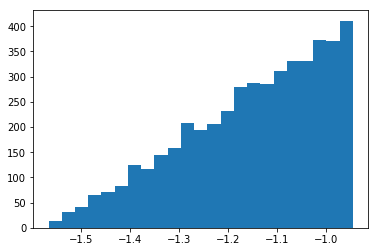

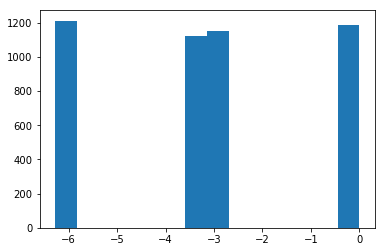

1.85029843536e-06
-3.13609686131e-06


In [35]:
latcoords1 = []
for i in np.arange(len(xconv)):
    latcoords1.append(np.arccos(zcoord[i]/np.sqrt(xcoord[i]**2 + ycoord[i]**2 + zcoord[i]**2)) - bcoord[i])

plt.hist(latcoords1, bins='auto')
plt.show()
    
longcoords1 = []
for i in np.arange(len(xconv)):
    longcoords1.append(np.arctan(ycoord[i]/xcoord[i]) - lcoord[i])

plt.hist(longcoords1, bins='auto')
plt.show()

radcoords1 = []
for i in np.arange(len(xconv)):
    radcoords1.append(xcoord[i]**2 + ycoord[i]**2 + zcoord[i]**2 - rcoord[i]**2)
        
print(max(radcoords1))
print(min(radcoords1))

### Velocities 

Since we care about proper motion, which is movement along the celestial sphere, we need the velocities in spherical coordinates. The galaxia output only gives it in cartesian, so we convert. 

In [13]:
#load cartesian velocities from galaxia, galaxy1.ebf. parameters came from default file
xvel = np.loadtxt("galaxia_vx") #km/s, heliocentric
yvel = np.loadtxt("galaxia_vy") #km/s, heliocentric
zvel= np.loadtxt("galaxia_vz") #km/s, heliocentric

In [14]:
#calculate velocities in spherical coordinates
r2 = np.multiply(xcoord,xcoord) + np.multiply(ycoord,ycoord) + np.multiply(zcoord,zcoord) #r^2
dr = (np.multiply(xcoord,xvel) + np.multiply(xcoord,xvel) + np.multiply(xcoord,xvel))/np.sqrt(r2) #\dot{r}
dtheta = (np.multiply(yvel,xcoord) - np.multiply(ycoord,xvel))/(np.multiply(xcoord,xcoord) + np.multiply(ycoord,ycoord)) #\dot{\theta}
dphi = (np.multiply(zvel,np.sqrt(r2)) - np.multiply(zcoord, dr))/r2 #\dot{\phi}

In [15]:
#just to make sure i know what multiply and sqrt are doing...
a1 = [1,2]
b1 = [3,4]
c1 = [5,6]
test = np.multiply(a1,a1) + np.multiply(b1,b1) + np.multiply(c1,c1)
print(np.sqrt(test))

[ 5.91607978  7.48331477]


## Changing the survey area

Here we perform the same analysis as above, but using different initial parameters. The initial parameters are all the same as before, except I changed the survey area from 1000 to 40000 square degrees (e.g. almost the whole sky.) I picked 40000 because it's a nice round number, and I wasn't sure if putting in 41253 was going to break the code.

### Positions

As before, we first investigate the cartesian coordinates

In [16]:
#load cartesian coordinates from galaxia, galaxy40000.ebf. 
#changed the survey area parameter in default file (which is given in square degrees) from 1000 to 40000
xcoord4e4 = np.loadtxt("galaxia40000_px") #kpc, heliocentric
ycoord4e4 = np.loadtxt("galaxia40000_py") #kpc, heliocentric
zcoord4e4 = np.loadtxt("galaxia40000_pz") #kpc, heliocentric

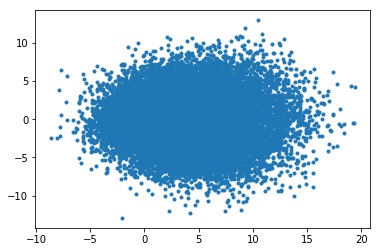

In [17]:
#slice of the x-y plane
plt.plot(xcoord4e4,ycoord4e4,'.')
plt.show()

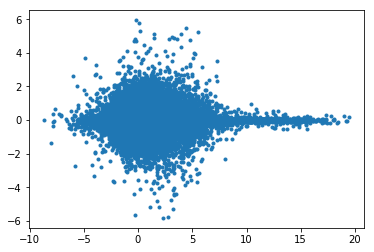

In [18]:
#slice of the x-y plane
plt.plot(xcoord4e4,zcoord4e4,'.')
plt.show()

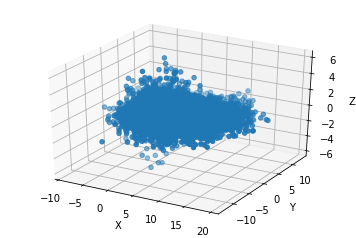

In [19]:
#full 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xcoord4e4, ycoord4e4, zcoord4e4)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

Now, spherical...

In [20]:
#load galactic coordinates from galaxia, galaxy40000.ebf.
bcoord4e4=(np.loadtxt("galaxia40000_glat"))*np.pi/180 #galactic latitude, degrees to radians
lcoord4e4=(np.loadtxt("galaxia40000_glon"))*np.pi/180 #galactice longitude, degrees to radians
rcoord4e4=np.loadtxt("galaxia40000_rad") #kpc, radial distance (from where- the sun?)

In [21]:
#convert from spherical to cartesian, for ease of plotting
xconv4e4 = rcoord4e4*np.sin(bcoord4e4)*np.cos(lcoord4e4)
yconv4e4 = rcoord4e4*np.sin(bcoord4e4)*np.sin(lcoord4e4)
zconv4e4 = rcoord4e4*np.cos(bcoord4e4)

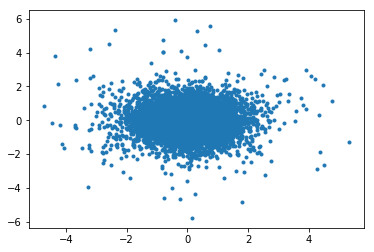

In [22]:
#slice of the x-y plane
plt.plot(xconv4e4,yconv4e4,'.')
plt.show()

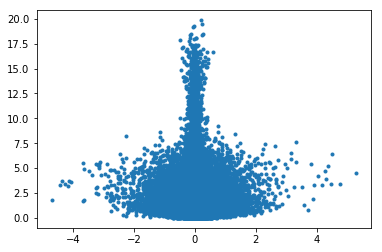

In [23]:
#slice of the x-y plane
plt.plot(xconv4e4,zconv4e4,'.')
plt.show()

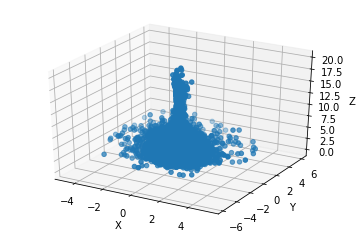

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xconv4e4, yconv4e4, zconv4e4)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [25]:
i = 19400

#difference of the radius squared, between cartesian and spherical data
print(xcoord4e4[i]**2 + ycoord4e4[i]**2 + zcoord4e4[i]**2 - rcoord4e4[i]**2)

#difference of the longitude coordinate, between the cartesian and spherical data
print(np.arctan(ycoord4e4[i]/xcoord4e4[i]) - lcoord4e4[i])

#difference of the latitude coordinate, between the cartesian and spherical data
print(np.arccos(zcoord4e4[i]/np.sqrt(xcoord4e4[i]**2 + ycoord4e4[i]**2 + zcoord4e4[i]**2)) - bcoord4e4[i])

-1.96386646389e-08
-7.28638621106e-08
1.5493445934


In [26]:
latcoords = []
for i in np.arange(len(xconv4e4)):
    latcoords.append((np.arccos(zcoord4e4[i]/np.sqrt(xcoord4e4[i]**2 + ycoord4e4[i]**2 + zcoord4e4[i]**2)) - bcoord4e4[i]))

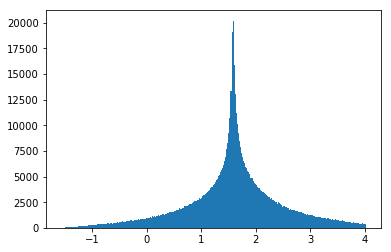

In [27]:
plt.hist(latcoords, bins='auto')
plt.show()

In [28]:
longcoords = []
for i in np.arange(len(xconv4e4)):
    longcoords.append(np.arctan(ycoord4e4[i]/xcoord4e4[i]) - lcoord4e4[i])

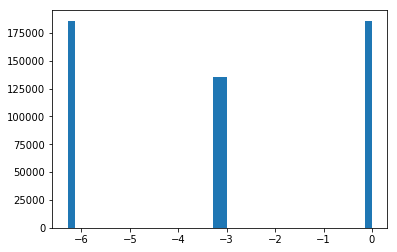

In [29]:
plt.hist(longcoords, bins='auto')
plt.show()

In [30]:
radcoords = []
for i in np.arange(len(xconv4e4)):
    radcoords.append(xcoord4e4[i]**2 + ycoord4e4[i]**2 + zcoord4e4[i]**2 - rcoord4e4[i]**2)

In [31]:
print(max(radcoords))
print(min(radcoords))

6.23038376375e-05
-5.08700594537e-05
